<a href="https://colab.research.google.com/github/karsarobert/DeepLearning2024/blob/main/04/PTE_DL4_spiral_Feldat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 3. gyakorlat: tensorflow, osztályozás
### 2024. szeptrember 18.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Szintetikus adatok előállítása

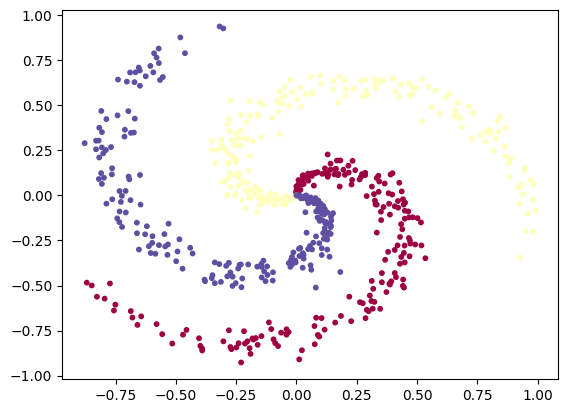

In [ ]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
y[190:210] # az osztálycimkéket számok reprezentálják

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

#Adatok átalakítása

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


y= tf.keras.utils.to_categorical(y, 3)

# split into train and test datasets

# determine the number of input features




(402, 2) (198, 2) (402, 3) (198, 3)


In [ ]:
y[190:210]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

#A modell létrehozása

In [ ]:
# define

# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #One-hot kódolt vektorokat vár címkeként. Például: [[0,0,1,0], [1,0,0,0], [0,1,0,0], [0,0,0,1]]
# fit



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#A modell értékelése

Test Accuracy: 0.985
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


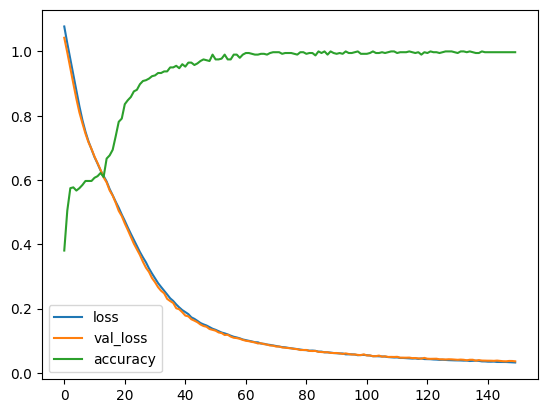

In [ ]:
import pandas as pd

# A modell értékelése
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
z = model.predict(X_test)


# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss','accuracy']].plot();

#A modell kimeneteinek értelmezése

In [ ]:
z[0] #softmax kimenet értelmezése

array([4.614028e-04, 9.995385e-01, 6.476801e-08], dtype=float32)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2853 (11.14 KB)
Trainable params: 2853 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
